# Results of Excitatory Cell Expressions for Female Naive Animals

In [2]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
deepST_excitatory = json.load(open('deepST_MAE_excitatory.json'))

In [3]:
deepST_excitatory_values = [deepST_excitatory["['Female']_['Naive']_" + str(i)] for i in range(1,5)] # female naive animals are 1,2,3,4

In [4]:
deepST_excitatory_values

[0.3569185733795166,
 0.35787373781204224,
 0.3585347831249237,
 0.35235148668289185]

In [5]:
deepST_excitatory_ligandsOnly = json.load(open('deepST_MAE_excitatory_ligandsOnly.json'))

In [6]:
deepST_excitatory_values_ligandsOnly = [deepST_excitatory_ligandsOnly["['Female']_['Naive']_" + str(i)] for i in range(1,5)] # female naive animals are 1,2,3,4

In [7]:
deepST_excitatory_values_ligandsOnly

[0.3696116507053375,
 0.3599299490451813,
 0.36921268701553345,
 0.36949148774147034]

In [8]:
MESSI_excitatory = json.load(open('../../MESSI/tutorials/MAE_excitatory.json'))

In [9]:
MESSI_excitatory_values = [MESSI_excitatory["Female_Naive_" + str(i)] for i in range(1,5)]

In [10]:
MESSI_excitatory_values

[0.3801549566526585,
 0.37628800688371333,
 0.37287921379680466,
 0.3751875515301305]

In [11]:
XGBoost_excitatory = json.load(open('XGBoost_MAE_excitatory.json'))

In [12]:
XGBoost_excitatory_values = [XGBoost_excitatory["['Female']_['Naive']_" + str(i)] for i in range(1,5)] # female naive animals are 1,2,3,4

In [13]:
XGBoost_excitatory_values

[0.38919976353645325,
 0.38447484374046326,
 0.37682753801345825,
 0.3889421224594116]

     deepST  deepST Ligands     MESSI   XGBoost
0  0.356919        0.369612  0.380155  0.389200
1  0.357874        0.359930  0.376288  0.384475
2  0.358535        0.369213  0.372879  0.376828
3  0.352351        0.369491  0.375188  0.388942


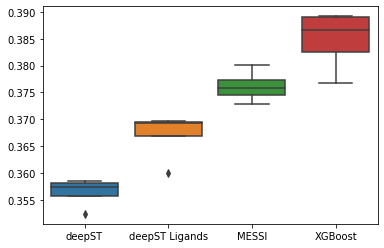

In [14]:
# create a DataFrame
df_deepST = pd.DataFrame({'deepST': deepST_excitatory_values})
df_MESSI = pd.DataFrame({'MESSI': MESSI_excitatory_values})
df_XGBoost = pd.DataFrame({'XGBoost': XGBoost_excitatory_values})
df_deepST_ligandsOnly = pd.DataFrame({'deepST Ligands': deepST_excitatory_values_ligandsOnly})

df = pd.concat([df_deepST, df_deepST_ligandsOnly, df_MESSI, df_XGBoost], axis=1)
print(df)

# create plot
ax = sns.boxplot(data=df)

# show plot
plt.show()

# Results of Inhibitory Cell Expressions for Female Naive Animals

In [97]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import seaborn as sns

In [98]:
deepST_inhibitory = json.load(open('deepST_MAE_inhibitory.json'))

In [99]:
deepST_inhibitory_values = [deepST_inhibitory["['Female']_['Naive']_" + str(i)] for i in range(1,5)] # female naive animals are 1,2,3,4

In [100]:
deepST_inhibitory_values

[0.3618801534175873,
 0.3553224503993988,
 0.34245067834854126,
 0.3655047118663788]

In [101]:
MESSI_inhibitory = json.load(open('../../MESSI/tutorials/MAE_inhibitory.json'))

In [102]:
MESSI_inhibitory_values = [MESSI_inhibitory["Female_Naive_" + str(i)] for i in range(1,5)]

In [103]:
MESSI_inhibitory_values

[0.38851713994478304,
 0.3816401350119967,
 0.36824040775225103,
 0.3915513018391496]

     deepST     MESSI
0  0.361880  0.388517
1  0.355322  0.381640
2  0.342451  0.368240
3  0.365505  0.391551


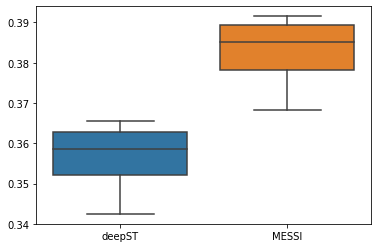

In [104]:
# create a DataFrame
df_deepST = pd.DataFrame({'deepST': deepST_inhibitory_values})
df_MESSI = pd.DataFrame({'MESSI': MESSI_inhibitory_values})

df = pd.concat([df_deepST, df_MESSI], axis=1)
print(df)

# create plot
ax = sns.boxplot(data=df)

# show plot
plt.show()

#### Boxplot Throwaway Code for Later

   Trial Number     value
0      1      1  0.356919
1      2      1  0.380155
2      1      2  0.357874
3      2      2  0.376288
4      1      3  0.358535


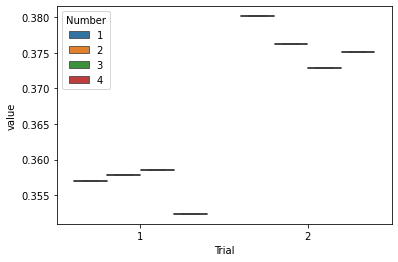

In [105]:
# DATAFRAMES WITH TRIAL COLUMN ASSIGNED
df1 = pd.DataFrame(np.array(deepST_excitatory_values).reshape(1,-1), columns=list(range(1,5))).assign(Trial=1)
df2 = pd.DataFrame(np.array(MESSI_excitatory_values).reshape(1,-1), columns=list(range(1,5))).assign(Trial=2)
# df3 = pd.DataFrame(np.random.randn(4,4), columns=list(range(1,5))).assign(Trial=3)

cdf = pd.concat([df1, df2])                                # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Trial'], var_name=['Number'])      # MELT

print(mdf.head())
#    Trial Number     value
# 0      1      1 -0.750615
# 1      1      1 -1.715070
# 2      1      1 -0.963404
# 3      1      1  0.360856
# 4      1      1 -1.190504

ax = sns.boxplot(x="Trial", y="value", hue="Number", data=mdf)  # RUN PLOT   
plt.show()

plt.clf()
plt.close()

In [42]:
cdf

,1,2,3,4,5,Trial
0,-2.574411,0.304598,1.892478,1.016249,-0.043740,1
1,-1.157576,-0.395647,-0.670122,0.319786,-0.295581,1
2,0.407370,-0.444789,-1.390877,1.675611,-1.380627,1
3,-1.276758,-0.776060,-0.593264,0.755448,0.360841,1
4,-0.493166,0.476000,2.204158,0.366667,0.214712,1
0,0.706339,-0.903900,2.795468,1.516808,-0.571381,2
1,0.559225,-2.098771,0.326304,0.002096,0.382765,2
2,-0.651914,1.086213,-0.943874,1.196011,-0.415406,2
3,-1.856418,-0.500294,1.785721,-1.637327,-1.078809,2
4,0.319484,-1.001783,-0.456294,-0.810443,0.633947,2


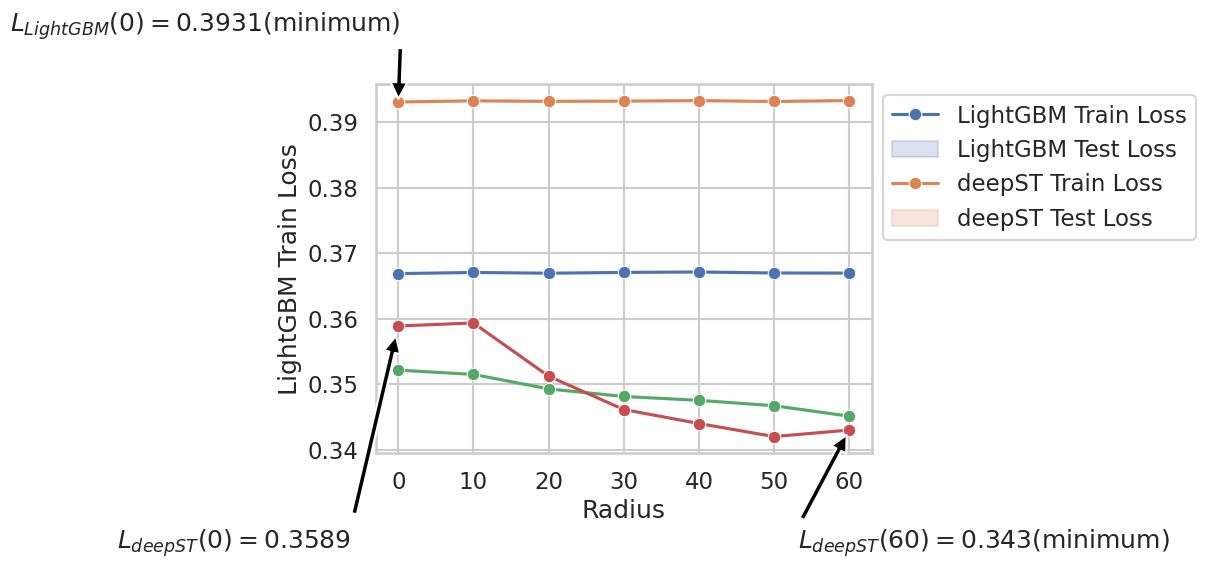

In [3]:
lightgbm_train = {0: 0.36687154522253007, 10: 0.36704256779382094, 20: 0.3669286524358801, 30: 0.36704890036396814, 40: 0.3671144034553719, 50: 0.36696370154104097, 60: 0.36694528763440054, 70: 0.3670999470507582, 80: 0.3669915129489699}
lightgbm_test = {0: 0.3930677145164025, 10: 0.3932398374054737, 20: 0.39316476258093197, 30: 0.3931982199864055, 40: 0.3932709117850623, 50: 0.39314322041464844, 60: 0.3932798993305558, 70: 0.39334263072139725, 80: 0.3931518974793018}
deepST_train = {0: 0.3521350920200348, 10: 0.35147982835769653, 20: 0.3492688536643982, 30: 0.3481127917766571, 40: 0.34752157330513, 50: 0.34670382738113403, 60: 0.3451015055179596, 70: 0.3450486958026886, 80: 0.3453604280948639}
deepST_test = {0: 0.3588748872280121, 5: 0.3607430160045624, 10: 0.3593329191207886, 15: 0.3552498519420624, 20: 0.3512137532234192, 25: 0.3464793562889099, 30: 0.34612327814102173, 35: 0.344502717256546, 40: 0.3439866602420807, 45: 0.34136509895324707, 50: 0.3419921398162842, 55: 0.3422633111476898, 60: 0.3429867625236511}

lightgbm_train_df = pd.DataFrame(lightgbm_train.items(), columns=['Radius', 'LightGBM Train Loss'])
lightgbm_test_df = pd.DataFrame(lightgbm_test.items(), columns=['Radius', 'LightGBM Test Loss'])
deepST_train_df = pd.DataFrame(deepST_train.items(), columns=['Radius', 'deepST Train Loss'])
deepST_test_df = pd.DataFrame(deepST_test.items(), columns=['Radius', 'deepST Test Loss'])

results_df = lightgbm_train_df.merge(lightgbm_test_df, on="Radius").merge(deepST_train_df, on="Radius").merge(deepST_test_df, on="Radius")

results_df

sns.set_theme("talk")
sns.set_style("whitegrid")
sns.lineplot(data=results_df, x="Radius", y="LightGBM Train Loss", marker='o')
sns.lineplot(data=results_df, x="Radius", y="LightGBM Test Loss", marker='o')
sns.lineplot(data=results_df, x="Radius", y="deepST Train Loss", marker='o')
sns.lineplot(data=results_df, x="Radius", y="deepST Test Loss", marker='o')

ax = plt.gcf().gca()
ax.annotate('$L_{LightGBM}(0) = ' + str(round(lightgbm_test[0], 4)) + '$' + '(minimum)', 
            xy=(0, lightgbm_test[0]),
            xycoords='data',
            xytext=(0.05, 1.2), 
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='top')

ax.annotate('$L_{deepST}(0) = ' + str(round(deepST_test[0], 4)) + '$', 
            xy=(0, deepST_test[0]),
            xycoords='data',
            xytext=(-0.05, -0.2), 
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='top')

ax.annotate('$L_{deepST}(60) = ' + str(round(deepST_test[60], 4)) + '$' + '(minimum)', 
            xy=(60, deepST_test[60]),
            xycoords='data',
            xytext=(1.6, -0.2), 
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right',
            verticalalignment='top')

plt.legend(labels=['LightGBM Train Loss', 'LightGBM Test Loss', 'deepST Train Loss', 'deepST Test Loss'], bbox_to_anchor=(1, 1))
# plt.legend(labels=['LightGBM Test Loss', 'deepST Test Loss'], bbox_to_anchor=(1, 1))

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.savefig('Figure6.png', bbox_inches="tight")

In [34]:
(deepST_test[60] - deepST_test[0])/deepST_test[0]

-0.01730225630924422